# Graded Assignment 2 - Household Consumption of Electricity and Gas


# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make a **copy** of `...-template.ipynb` and
**rename** it to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions in the cells that are between the cells with `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

# Personalize your notebook:
1. Copy the following three lines of code:

  ```python
AUTHOR_NAME = 'Your Full Name'
AUTHOR_ID_NR = '1234567'
AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
2. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2025-11-15') as strings between the `Author` markers.
3. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [194]:
#// BEGIN_TODO [Author] (0 points)

AUTHOR_NAME = 'Ivan Sergeevich Mishin'
AUTHOR_ID_NR = '2076209'
AUTHOR_DATE = '2024-12-30'


In [195]:
#// END_TODO [Author]

<div class="alert alert-block alert-danger">
<b>Warning:</b>

To complete this assignment, only use the techniques covered in the programming exercises. Do not use techniques found online or through tools like ChatGPT.
</div>

# Organizational matters

Welcome to the second graded assignment of the course Foundations of Data Analytics! This assignment consists of four parts:

1. Data retrieval and preprocessing.
2. Formulating and testing a hypothesis.
3. Creating a **poster** on which you report and discuss your findings.
4. A pitch in which you try to motivate others to read your poster.

> **Note:** you are required to use the template provided on Canvas for the poster.

The deadline for the graded assignment, involving both the submission of this notebook and your poster, is **Friday January 10 at 21:00**. Then, on **Monday January 13** during the lab session, you will give your pitch.

Your assignment will be graded on three components: the work in this notebook, graded by Momotor, your poster, and the pitches. You can get up to 40 points for the part of this notebook graded by Momotor, 50 points for the poster part, including the results obtained in the part of this notebook not graded by Momotor, and 10 points for the pitch part. Additionally, you can get up to 10 bonus points for originality, creativity, or depth of your analysis.

<div class="alert alert-block alert-danger">
<b>Three very important remarks:</b>

1. Make sure that the **visualizations that you include in your poster** are also produced by your notebook. **Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab, i.e., make sure that every visualization on your poster can also be seen under that tab.
2. Submit your notebook before the deadline and make sure **Momotor does not give any errors in any tab**.
3. **Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**.
</div>

# Introduction

In GA1, you studied the impact of the weather and socioeconomic factors on gas consumption in Dutch municipalities. In this graded assignment, you will investigate and compare the consumption of gas and electricity of two individual Dutch households in the Netherlands for one year.

* First, you will retrieve the necessary data from a database, clean it, and prepare it for the analysis.
* Second, you will formulate your own problem statement related to the gas and/or electricity consumption of individual households.
* Third, you will formulate a hypothesis and an appropriate hypothesis test and perform this test for each of the two households.
* Then, after you finish the notebook:
    * On the poster, you will explain the choices you made during the assignment, present your findings, and discuss the limitations of your study.
    * In the pitch, you will tell your peers about your study in one minute with the goal to get your audience interested in your study, trying to improve your presentation skills based on the attention points you identified after the first pitch.

**Critical thinking** is one of the key skills you are expected to develop during your Bachelor studies. As this assignment is part of the CBL (challenge-based learning) line of the Bachelor program, you are not only to analyze data, but also to reflect on the limitations of your analysis coming from the choice of methods used in the data analysis, data quality, data quantity, etc. Some risks of overgeneralization become visible when comparing data from two households. Keep that in mind when conducting the analysis. You will present the most important findings related to the limitations of your study on your poster.

## Origin of the data

**Gas and electricity consumption**

You will use a data set collected by [Liander](https://www.liander.nl/over-ons/open-data), a Dutch energy grid operator. The data comes from smart meters from households that gave permission to record their gas and electricity consumption for research purposes. Some data cleaning was already performed, for example, unrealistic values were removed.

The data was collected in 2013. Gas consumption was recorded per hour and electricity consumption per 15 minutes and then aggregated per hour. For some households, the records also include the type of household, the type of house, and the age of the house. The locations of the households are unknown.

**Weather data**

You will also use weather data collected by the Royal Netherlands Meteorological Institute (KNMI) in 2013, at the Bilt weather station. This weather station is located centrally in the Netherlands and considered to be the best approximation for the weather when no location data is available.

## Personalization

This assignment is personalized. You should have received an e-mail containing a string that encodes the households.

1. Copy the following two lines of code:

  ```python
household_1 = "Customer X"
household_2 = "Customer Y"
  ```

2. Paste them between the marker lines in the next code cell.
3. Replace Customer X and Customer Y with the households you received in your email as strings between quotes.
4. Run the code cell.

In [196]:
#// BEGIN_TODO [Personalization] (1 point)

household_1 = "Customer 20"
household_2 = "Customer 44"


In [197]:
#// END_TODO [Personalization]

# Description of the dataset

The data for this assignment is stored in a database in `GA2_files/data.db`. The database contains five tables. These tables have been translated from Dutch to English where necessary.

## The `customer` table

| Column  | Type | Description |
|:-------|:----|:----|
| customer | str | A unique label identifying this customer. |
| house_type | str | The type of house, if known. Possible non-null values: Semi-detached house, Terraced house, Detached house, Apartment. |
| build_era | str | The period in which the house was built, if known. Possible non-null values: Before 1940, 1940 - 1979, 1980 - present. |
| household_type | str | The type of family that lives in the house, if known. Possible non-null values: Single, Family with children, Couple without children. |

The first few rows/columns of the customer table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>customer</th>
      <th>house_type</th>
      <th>build_era</th>
      <th>household_type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Customer 2</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Customer 4</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Customer 5</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Customer 6</td>
      <td>Semi-detached house</td>
      <td>Before 1940</td>
      <td>Couple without children</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Customer 7</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `gas` table

This table contains gas consumption for each hour of the year in columns "Customer `n`" for each customer. The column name is thus the label Customer from the `customer` table.

|Column | Type | Unit | Description |
|:------|:-----|:-----|:------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| Customer `n` | float | $m^3$ | The amount of gas used in this period by this customer. |

The first few rows/columns of the gas table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>Customer 2</th>
      <th>Customer 4</th>
      <th>Customer 5</th>
      <th>Customer 6</th>
      <th>Customer 8</th>
      <th>Customer 10</th>
      <th>Customer 11</th>
      <th>Customer 14</th>
      <th>...</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>0.578286</td>
      <td>0.000000</td>
      <td>0.166643</td>
      <td>0.000000</td>
      <td>0.293928</td>
      <td>0.000000</td>
      <td>0.219519</td>
      <td>0.050962</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>0.090742</td>
      <td>0.000000</td>
      <td>0.151401</td>
      <td>0.168662</td>
      <td>0.269638</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.149491</td>
      <td>0.000000</td>
      <td>0.040605</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.192151</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.121399</td>
      <td>0.000000</td>
      <td>0.001121</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.024404</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.158747</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.088286</td>
      <td>...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

The `datetime` column represents the **end** time of a measuring period, but at midnight the date changes while the measurement concerns the last hour of the previous day. Therefore, the column `date` was added to simplify the programming part for you. The values correspond to the date **during** the measuring period, i.e., the hour preceding the value in `datetime`.

For example: in the table below, the row with `datetime` = `2013-06-20 00:00` concerns measurements taken between `2013-06-19 23:00` and `2013-06-20 00:00` and therefore these measurements belong to `date` = `2013-06-19`.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>...</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4077</th>
      <td>2013-06-19 22:00:00</td>
      <td>2013-06-19</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4078</th>
      <td>2013-06-19 23:00:00</td>
      <td>2013-06-19</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4079</th>
      <td>2013-06-20 00:00:00</td>
      <td>2013-06-19</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4080</th>
      <td>2013-06-20 01:00:00</td>
      <td>2013-06-20</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4081</th>
      <td>2013-06-20 02:00:00</td>
      <td>2013-06-20</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4082</th>
      <td>2013-06-20 03:00:00</td>
      <td>2013-06-20</td>
      <td>...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `electricity` table

This table contains electricity consumption for each hour of the year in columns "Customer `n`" for each customer. The column name is thus the label Customer from the `customer` table.

|Column | Type | Unit | Description |
|:------|:-----|:-----|:------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| Customer `n` | float | $Wh$ | The amount of electricity used in this period by this customer. |

The column `date` was added to simplify the programming part for you. Please see the explanation with the `gas` table.

The first few rows/columns of the electricity table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>Customer 2</th>
      <th>Customer 4</th>
      <th>Customer 5</th>
      <th>Customer 6</th>
      <th>Customer 8</th>
      <th>Customer 10</th>
      <th>Customer 11</th>
      <th>Customer 14</th>
      <th>...</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>791.0</td>
      <td>60.0</td>
      <td>166.0</td>
      <td>563.0</td>
      <td>744.0</td>
      <td>80.0</td>
      <td>261.0</td>
      <td>148.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>479.0</td>
      <td>59.0</td>
      <td>197.0</td>
      <td>382.0</td>
      <td>688.0</td>
      <td>107.0</td>
      <td>114.0</td>
      <td>180.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>286.0</td>
      <td>79.0</td>
      <td>131.0</td>
      <td>112.0</td>
      <td>486.0</td>
      <td>59.0</td>
      <td>104.0</td>
      <td>154.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>199.0</td>
      <td>125.0</td>
      <td>192.0</td>
      <td>96.0</td>
      <td>353.0</td>
      <td>102.0</td>
      <td>123.0</td>
      <td>147.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>112.0</td>
      <td>84.0</td>
      <td>153.0</td>
      <td>110.0</td>
      <td>348.0</td>
      <td>67.0</td>
      <td>112.0</td>
      <td>174.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `weather` table

| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| temperature | float | $°C$ | Average temperature during the measuring period, at an altitude of 1.50 m. |
| wind_speed | float | $m/s$ | Average wind speed during the measuring period. |

The column `date` was added to simplify the programming part for you. Please see the explanation with the `gas` table.

The first few rows/columns of the weather table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>temperature</th>
      <th>wind_speed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>8.5</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `weather_extra` table

| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| wind_direction | int | $°$ | Mean wind direction (in degrees) during the measuring period (360=north, 90=east, 180=south, 270=west, 0=calm, 990=unstable). |
| wind_gust | float | $m/s$ | Maximum wind gust during the measuring period. |
| sunshine_duration | float | $hours$ | Sunshine duration during the measuring period, calculated from global radiation (-1 for <0.05 hour). |
| global_radiation | float | $J/cm^2$ | Global radiation during the measuring period. |
| precipitation | float | $mm$ | Total precipitation amount during the measuring period (-1 for <0.05 mm). |
| air_pressure | float | $hPa$ | Air pressure reduced to mean sea level, at the time of observation. |
| cloud_cover | float | $octants$ | Cloud cover (in octants), at the time of observation (0=sky completely clear, ..., 4=sky half cloudy, ..., 8=sky completely cloudy, 9=sky invisible). |
| humidity | float | $\%$ | Relative atmospheric humidity at 1.50 m above the ground at the time of observation. |
| fog | int | - | Fog (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| rainfall | int | - | Rainfall (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| snow | int | - | Snow (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| thunder | int | - | Thunder (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| ice_formation | int | - | Ice formation (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |

The column `date` was added to simplify the programming part for you. Please see the explanation with the `gas` table.

The first few rows/columns of the weather_extra table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>wind_direction</th>
      <th>wind_gust</th>
      <th>sunshine_duration</th>
      <th>global_radiation</th>
      <th>precipitation</th>
      <th>air_pressure</th>
      <th>cloud_cover</th>
      <th>humidity</th>
      <th>fog</th>
      <th>rainfall</th>
      <th>snow</th>
      <th>thunder</th>
      <th>ice_formation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>210</td>
      <td>12.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>999.3</td>
      <td>8.0</td>
      <td>93.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>220</td>
      <td>12.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.8</td>
      <td>999.0</td>
      <td>8.0</td>
      <td>95.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>230</td>
      <td>11.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.3</td>
      <td>998.9</td>
      <td>8.0</td>
      <td>95.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>230</td>
      <td>9.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.4</td>
      <td>998.9</td>
      <td>8.0</td>
      <td>95.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>220</td>
      <td>8.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.1</td>
      <td>998.8</td>
      <td>8.0</td>
      <td>96.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

# Preparation

## Loading the libraries

In [198]:
import numpy as np
import pandas as pd
import sqlite3

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set_theme()
plt.rcParams['figure.figsize'] = 16, 9  # default hor./vert. size of plots, in inches

## Loading the data

1. Connect to the SQLite database in the `'GA2_files/data.db'` file. Use a **single SQL query** to retrieve from the `customer` table a dataframe with the households assigned to you. Store the query in the variable `query_customer`. Store the dataframe in the variable `df_customer`. Make sure the table is indexed by the customer column. Check the contents of `df_customer` to see if there is any additional information about either of the two households.

   **Hint:** pass for instance the keyword argument `index_col='customer'` to the `read_sql_query` function.

In [199]:
#// BEGIN_TODO [Extract-customers] (2 points)

conn = sqlite3.connect('GA2_files/data.db')


In [200]:
query_customer = f'SELECT * FROM customer WHERE customer = "{household_1}" OR customer = "{household_2}";'

df_customer = pd.read_sql_query(query_customer, conn, index_col='customer')
df_customer

,house_type,build_era,household_type
customer,,,
Customer 20,Terraced house,1940 - 1979,Couple without children
Customer 44,None,None,None


In [201]:
#// END_TODO [Extract-customers]

2. Use a **single SQL query** to retrieve `gas`, `electricity`, and `weather` data from the corresponding tables. Create a dataframe for `household_1` containing columns `date`, `gas`, `electricity`, `temperature`, and `wind_speed` with a row for every hour in 2013. For the index, use the `datetime`. Store the query in the variable `query_household_1`. Store the dataframe in the variable `df_household_1`. Make sure the table is indexed by the datetime column. Also make sure that both `datetime` and `date` are parsed correctly.

   **Hint:** pass for instance the keyword argument `parse_dates=['datetime', 'date']` to the `read_sql_query` function.

> It is important to note that the `datetime` column represents the **end** time of a measuring period while the `date` column represents the date **during** the measuring period. For example: the row with `datetime` = `2013-06-19 00:00` concerns measurements taken between `2013-06-18 23:00` and `2013-06-19 00:00` and therefore these measurements belong to `date` = `2013-06-18`.

Your output should look similar to the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>date</th>
      <th>gas</th>
      <th>electricity</th>
      <th>temperature</th>
      <th>wind_speed</th>
    </tr>
    <tr>
      <th>datetime</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2013-01-01 01:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>563.0</td>
      <td>8.6</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>2013-01-01 02:00:00</th>
      <td>2013-01-01</td>
      <td>0.168662</td>
      <td>382.0</td>
      <td>8.5</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2013-01-01 03:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>112.0</td>
      <td>8.6</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2013-01-01 04:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>96.0</td>
      <td>8.6</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2013-01-01 05:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>110.0</td>
      <td>8.6</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2013-12-31 20:00:00</th>
      <td>2013-12-31</td>
      <td>0.000000</td>
      <td>843.0</td>
      <td>6.6</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2013-12-31 21:00:00</th>
      <td>2013-12-31</td>
      <td>0.037085</td>
      <td>860.0</td>
      <td>6.1</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>2013-12-31 22:00:00</th>
      <td>2013-12-31</td>
      <td>0.000000</td>
      <td>682.0</td>
      <td>5.9</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2013-12-31 23:00:00</th>
      <td>2013-12-31</td>
      <td>0.000000</td>
      <td>747.0</td>
      <td>5.9</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2014-01-01 00:00:00</th>
      <td>2013-12-31</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6.0</td>
      <td>5.0</td>
    </tr>
  </tbody>
</table>
<p>8760 rows × 5 columns</p>
</div>

In [202]:
#// BEGIN_TODO [Extract-household-1] (5 points)

query_household_1 = (f'SELECT g.datetime, g.date, g."{household_1}" AS gas, e."{household_1}" AS electricity, w.temperature, w.wind_speed '
                      f'FROM gas AS g, electricity AS e, weather AS w '
                      f'WHERE g.datetime = e.datetime AND g.datetime = w.datetime;')

df_household_1 = pd.read_sql_query(query_household_1, conn, index_col='datetime', parse_dates=['datetime', 'date'])
df_household_1

,date,gas,electricity,temperature,wind_speed
datetime,,,,,
2013-01-01 01:00:00,2013-01-01,0.0,505.0,8.6,8.0
2013-01-01 02:00:00,2013-01-01,0.0,288.0,8.5,6.0
2013-01-01 03:00:00,2013-01-01,0.0,226.0,8.6,5.0
2013-01-01 04:00:00,2013-01-01,0.0,153.0,8.6,6.0
2013-01-01 05:00:00,2013-01-01,0.0,341.0,8.6,4.0
...,...,...,...,...,...
2013-12-31 20:00:00,2013-12-31,0.0,415.0,6.6,6.0
2013-12-31 21:00:00,2013-12-31,0.0,488.0,6.1,4.0
2013-12-31 22:00:00,2013-12-31,0.0,523.0,5.9,5.0


In [203]:
#// END_TODO [Extract-household-1]

3. Create a dataframe for `household_2` in the same way as for `household_1`. Store the query in the variable `query_household_2`. Store the dataframe in the variable `df_household_2`. Make sure the dataframe has the same format as `df_household_1`.

In [204]:
#// BEGIN_TODO [Extract-household-2] (2 points)

query_household_2 = (f'SELECT g.datetime, g.date, g."{household_2}" AS gas, e."{household_2}" AS electricity, w.temperature, w.wind_speed '
                      f'FROM gas AS g, electricity AS e, weather AS w '
                      f'WHERE g.datetime = e.datetime AND g.datetime = w.datetime;')

df_household_2 = pd.read_sql_query(query_household_2, conn, index_col='datetime', parse_dates=['datetime', 'date'])
df_household_2

,date,gas,electricity,temperature,wind_speed
datetime,,,,,
2013-01-01 01:00:00,2013-01-01,0.000000,70.0,8.6,8.0
2013-01-01 02:00:00,2013-01-01,0.000000,73.0,8.5,6.0
2013-01-01 03:00:00,2013-01-01,0.000000,86.0,8.6,5.0
2013-01-01 04:00:00,2013-01-01,0.000000,69.0,8.6,6.0
2013-01-01 05:00:00,2013-01-01,0.000000,68.0,8.6,4.0
...,...,...,...,...,...
2013-12-31 20:00:00,2013-12-31,0.325474,372.0,6.6,6.0
2013-12-31 21:00:00,2013-12-31,0.239018,1207.0,6.1,4.0
2013-12-31 22:00:00,2013-12-31,0.089016,1145.0,5.9,5.0


In [205]:
#// END_TODO [Extract-household-2]

# Data quality

Earlier in this assignment, it was stated that the data was partially cleaned (e.g., the datetime columns in the different tables were converted to the same format, the data and metadata (column names) were translated to English, and unrealistic measurements were removed). But,
* How complete is the data?
* How much data is missing and on which days is it missing?

1. For each of the two households, add a column `missing` to the dataframe holding Boolean values to signal if there is at least one missing value in that row (`True`) or not, i.e., all values of the row are present (`False`). Then determine what percentage of data is missing or incomplete for each household (i.e., the percentage of rows with a NaN value). Store your answer in variables `household_1_missing_percent` and `household_2_missing_percent`.

   **Hint:** Check the [Hints](https://canvas.tue.nl/courses/28674/pages/hints) page on Canvas if you get stuck!

In [206]:
#// BEGIN_TODO [Missing-data] (4 points)

df_household_1['missing'] = df_household_1.isnull().any(axis=1)
household_1_missing_percent = df_household_1['missing'].mean() * 100

df_household_2['missing'] = df_household_2.isnull().any(axis=1)
household_2_missing_percent = df_household_2['missing'].mean() * 100


In [207]:
household_1_missing_percent, household_2_missing_percent

(np.float64(0.03424657534246575), np.float64(0.03424657534246575))

In [208]:
#// END_TODO [Missing-data]

2. Even if there is enough data to work with, having several missing values on the same day may still be problematic. Check if the missing values are concentrated on particular days.

    For each day, calculate the percentage of rows with missing values. Store your results as Series in variables `s_missing_household_1` and `s_missing_household_2` with `date` as index.

In [209]:
#// BEGIN_TODO [Missing-daily] (4 points)

s_missing_household_1 = df_household_1.groupby(['date'])['missing'].apply(lambda g: g.mean() * 100)
s_missing_household_2 = df_household_2.groupby(['date'])['missing'].apply(lambda g: g.mean() * 100)


In [210]:
#// END_TODO [Missing-daily]

3. Look at your results from the previous step.
    * Are the missing data clustered or scattered?
    * Are there significant differences between the two households?
    * Do you think this could potentially affect future analysis choices (and if so, how)?
    * Can it have influence on the results of the data analysis (and if so, how)?

   Reflect on the points above and store your observations as a string in the variable `observations_missing_data`.

In [211]:
#// BEGIN_TODO [Observations-missing-data] (2 points)

s_missing_household_1

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.000000
2013-01-05    0.000000
                ...   
2013-12-27    0.000000
2013-12-28    0.000000
2013-12-29    0.000000
2013-12-30    0.000000
2013-12-31    4.166667
Name: missing, Length: 365, dtype: float64

In [212]:
s_missing_household_2

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.000000
2013-01-05    0.000000
                ...   
2013-12-27    0.000000
2013-12-28    0.000000
2013-12-29    0.000000
2013-12-30    0.000000
2013-12-31    4.166667
Name: missing, Length: 365, dtype: float64

In [213]:
observations_missing_data = 'In total, there are only three rows with missing data in each of the datasets. Moreover, these rows are exactly the same - 2013-10-27 01:00, 2013-10-27 02:00 and 2014-01-01 00:00. It is not possible to analyze this data as there are no enough missing values to judge whether it is scattered or clustered but both days are closer to the end of the year. This may be caused by some errors in measurement equipment that affected all customers at the same time, for example there may be electricity outage at this moment. I do not think it has a significant impact on the analysis so these values can be simply removed as the are not even close to a percent of data.'

In [214]:
#// END_TODO [Observations-missing-data]

# Taking a first look at the data

Before writing a hypothesis, it is good to see what the data looks like. Therefore, in this section, you will create several figures to learn more about the data. Ask yourself what is interesting about each plot and try to come up with plausible explanations.

1. Use `df_household_1` and `df_household_2` to plot the hourly gas and electricity consumption of `household_1` and `household_2`. Create a figure with four line plots -- two showing hourly gas consumption and two showing electricity consumption side-by-side for each household for the entire year. What can you learn from this figure? Write your observations as a string in the variable `observations_figure_1`.

> **Note:** Do not forget to follow the best practices for visualizations.
  **This applies to all coming tasks requiring visualizations.**
  You must:
> - Include a descriptive **title**.
> - Add **labels** to the **axes** and include the **units** of the quantities on the axes if applicable.
> - Ensure that the plot is **readable** and **understandable** (also for somebody who is color-blind).
> - Choose appropriate **ranges** for the plot **axes**.
> - Include a **legend** when appropriate.

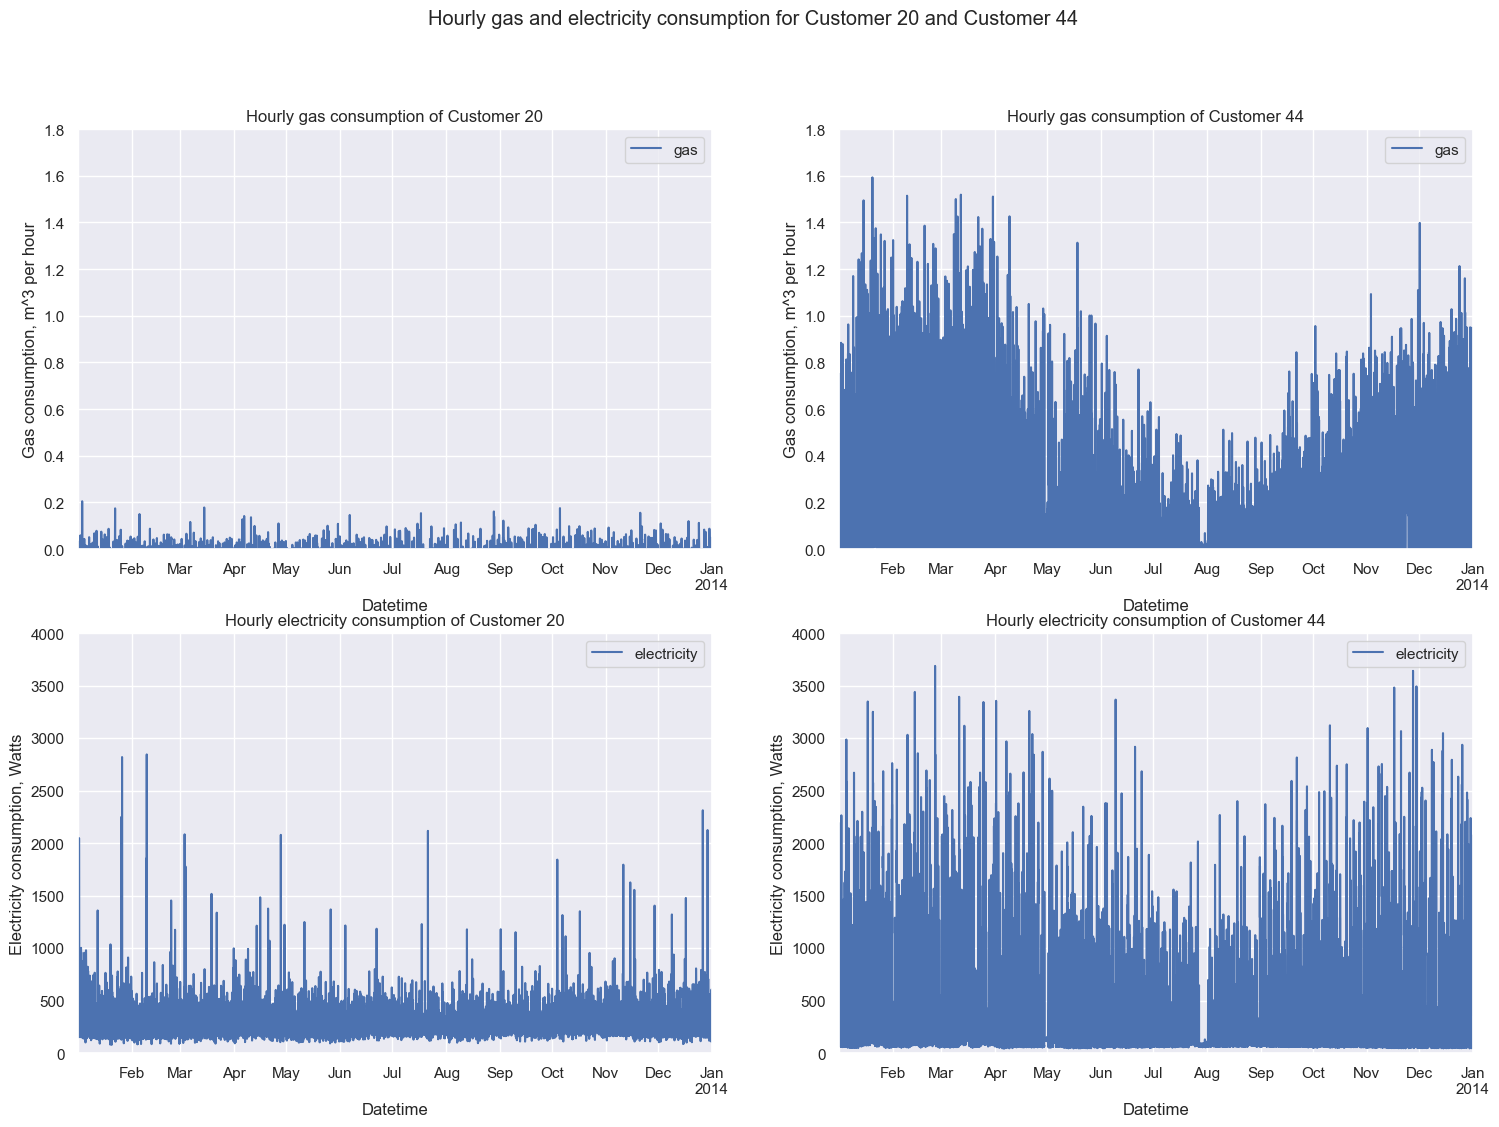

In [215]:
#// BEGIN_TODO [First-look] (3 points)

fig, ax = plt.subplots(2, 2, figsize = (18, 12))

df_household_1.plot(kind='line', y='gas', ax=ax[0, 0])
ax[0, 0].set_xlabel('Datetime')
ax[0, 0].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 0].set_ylim(0, 1.8)
ax[0, 0].set_title(f'Hourly gas consumption of {household_1}')

df_household_2.plot(kind='line', y='gas', ax=ax[0, 1])
ax[0, 1].set_xlabel('Datetime')
ax[0, 1].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 1].set_ylim(0, 1.8)
ax[0, 1].set_title(f'Hourly gas consumption of {household_2}')

df_household_1.plot(kind='line', y='electricity', ax=ax[1, 0])
ax[1, 0].set_xlabel('Datetime')
ax[1, 0].set_ylabel('Electricity consumption, Watts')
ax[1, 0].set_ylim(0, 4000)
ax[1, 0].set_title(f'Hourly electricity consumption of {household_1}')

df_household_2.plot(kind='line', y='electricity', ax=ax[1, 1])
ax[1, 1].set_xlabel('Datetime')
ax[1, 1].set_ylabel('Electricity consumption, Watts')
ax[1, 1].set_ylim(0, 4000)
ax[1, 1].set_title(f'Hourly electricity consumption of {household_2}')

fig.suptitle(f'Hourly gas and electricity consumption for {household_1} and {household_2}');


In [216]:
observations_figure_1 = f'From these plots we can get more insight into differences between customers. We can definitely see that {household_1} has lower electricity consumption and way lower gas consumption than {household_2}. We can also see that data for {household_1} is pretty much linear while there definitely is something that affects consumption for {household_2}.'

In [217]:
#// END_TODO [First-look]

2. Create two more figures of your choosing, based on your observations and questions they led to. Perhaps you want to zoom in on a particular period, look at other columns of the dataframes, apply some filter, or try different kinds of plots. Write your observations for the two new figures as strings in the variables `observations_figure_2` and `observations_figure_3` respectively.

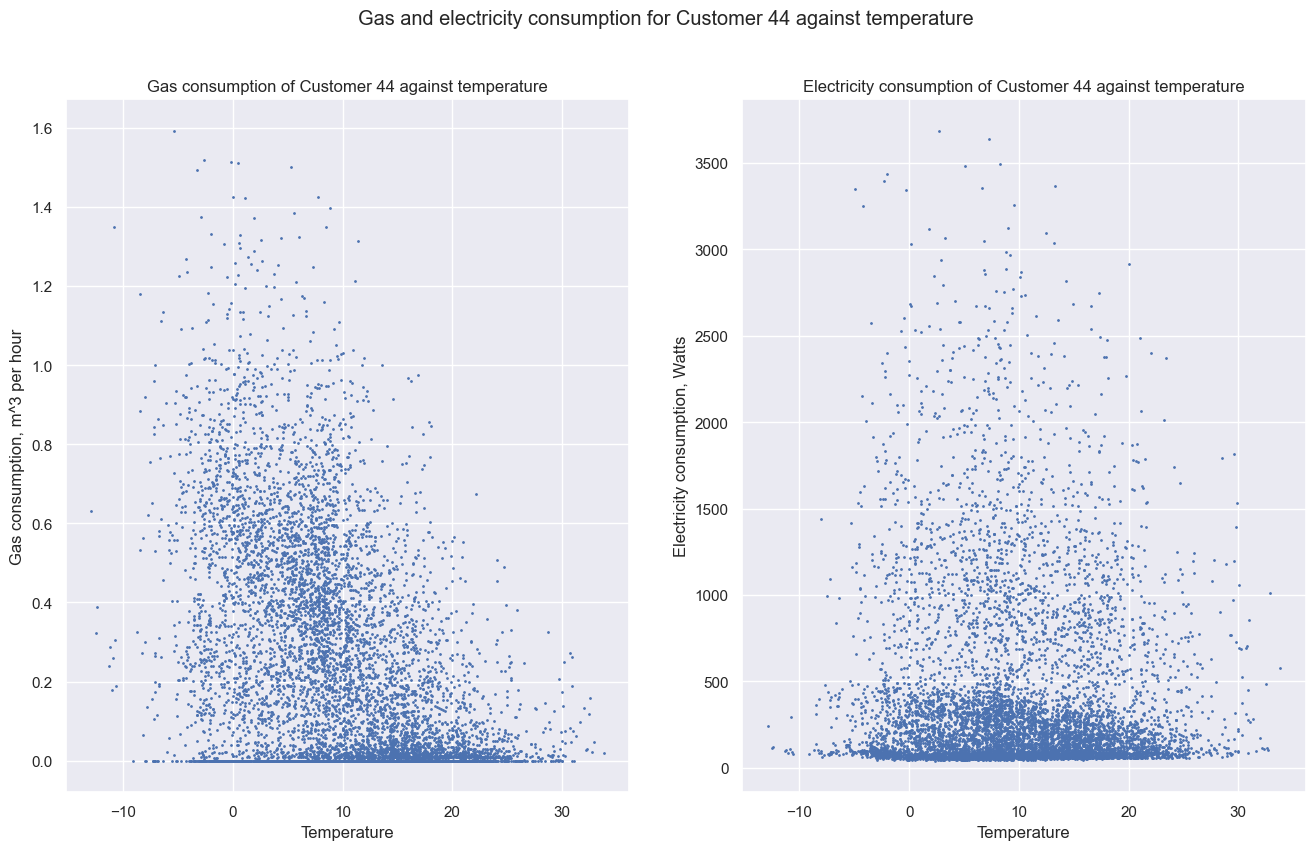

In [218]:
#// BEGIN_TODO [More-figures] (3 points)

fig, ax = plt.subplots(1, 2, sharex=True)

df_household_2.plot(kind='scatter', x='temperature', y='gas', ax=ax[0], s=1)
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Gas consumption, m^3 per hour')
ax[0].set_title(f'Gas consumption of {household_2} against temperature')

df_household_2.plot(kind='scatter', x='temperature', y='electricity', ax=ax[1], s=1)
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Electricity consumption, Watts')
ax[1].set_title(f'Electricity consumption of {household_2} against temperature')

fig.suptitle(f'Gas and electricity consumption for {household_2} against temperature');


In [219]:
observations_figure_2 = f'From this figure we can see that there is some sort of negative correlation between temperature and gas consumption. This can be explain with heating that is turned on when temperature is low. However, we can see that this correlation is very weak and plot also has a lot of dots near the zero consumption. This is probably during the night when people are sleeping and not using gas.'
observations_figure_3 = f'From this figure there is no obvious correlation between temperature and electricity consumption. However there should be some correlation like for gas as in the previous tasks because they were pretty similar. This may be because of electricity consumption being much more spread out throughout the day therefore there are much more dots with lower but not exactly zero consumption.'

In [220]:
#// END_TODO [More-figures]

# Problem statement

1. This assignment is part of the CBL (challenge-based learning) line of the Bachelor program. As part of the challenge, you are to formulate your own problem statement (question) **related to the gas and/or electricity consumption** of an individual household. You may find inspiration in the results you obtained for GA1, in the knowledge from previous courses or from high school, the news, or just common sense. Formulate a question that you may reasonably be able to answer with the data you have here. The question should be interesting for other households as well, or it might be relevant for energy providers or in the context of energy transition (from gas to electricity).

   Store your problem statement as a string in the variable `problem_statement`.

   In case you find it hard to think of a problem statement, you could try thinking in one of the following directions. While you are welcome to use these ideas, take into account that you can earn bonus points for coming up with an interesting and original problem statement.
    1. Many people set their thermostat to a lower temperature at night than during the day. For example, at night, heating might be set to maintain the room temperature of 15 degrees Celsius, but during the day the thermostat is set to maintain the temperature at 20 degrees Celsius. You could write a problem statement related to the presence of such patterns in the data.
    1. You could create a prediction model for gas usage. The data you have here is very different from GA1, but you could train a regression model using weather and gas usage data and then explore potential bias of your model. For example: are there differences in model performance on colder days versus warmer days?

In [221]:
#// BEGIN_TODO [Problem-statement] (0 points)

problem_statement = f'From the observations_figure_1 we can clearly see that for {household_2} there is a yearly correlation where in summer consumption is lower. This is mostly due to gas heating in the house. observations_figure_2 sort of confirms it as it shows weak correlation between temperature and gas consumption. It makes sense that temperature affects how much gas has to be spend to keep the same temperature of a house. But much more interesting investigation would be to find correlation with less obvious factors. We are given table weather_extra that has some more data that can be investigated. Another thing that fluctuates a lot throughout the year in the Netherlands is the amount of sunshine. So I stated a question - is there a correlation between the amount of sun hours in a day and the amount of gas spent on heating?'


In [222]:
#// END_TODO [Problem-statement]

2. Now formulate a general hypothesis that could help to address the question from the problem statement that you have formulated. This hypothesis may only provide a part of the answer, but that is enough for this assignment. A good hypothesis for this assignment should lead to potentially useful insights. Ask yourself what you could learn depending on the outcomes of your hypothesis testing; how can the knowledge you created be used? The result is interesting, whether the hypothesis will be rejected or not. Remember that you cannot prove a causal relationship.

   Here is an example of a reasonable general hypothesis unrelated to this project: "Students who do sports perform better in their university studies.". You cannot be sure of the outcome of hypothesis testing in advance, and any outcome, rejecting the hypothesis or not, is interesting and relevant.

   Store your hypothesis as a string in the variable `hypothesis`.

In [223]:
#// BEGIN_TODO [Hypothesis] (0 points)

hypothesis = f'households spend less gas on the days when there is more hours of sunshine.'

In [224]:
#// END_TODO [Hypothesis]

3. Refine your general hypothesis into a **testable** hypothesis.

   **Ask questions**

   Carefully go over your hypothesis and note which parts are not sufficiently specific or not testable. You could write it down on paper and underline any words that could be more specific. For each of the underlined keywords, ask (write down) questions that could help specify this part. Even trivial things are welcome. You do not need to answer these questions right away; that comes in the next step. Questions can be:
   - What is this, exactly?
   - How can we choose a threshold value? Why is that a reasonable choice?
   - What should be measured to represent this keyword?
   - Is there enough data to test the hypothesis and to see a baseline?
   - What are confounding variables and how can we reduce the number of confounding variables?

   **Answer questions**

   Now start answering the questions from the previous step. You may also want to check the available data for some of them: when you make decisions you want to make sure you keep enough data. Even when you keep enough data, you still should check that you are not discarding too much.

   You can find an elaborate refinement of the example hypothesis "Students who do sports perform better in their university studies." in `Example_hypothesis_refinement.pdf` which was included in the ZIP of this assignment.

   Store your refined hypothesis as a string in the variable `refined_hypothesis`. Keep your notes, as they may be useful for the poster.

In [225]:
#// BEGIN_TODO [Refined-hypothesis] (0 points)

refined_hypothesis = f'{household_1} and {household_2} spend less qubic meters of gas measured by smart meter in their households on the days when there is 6 or more hours of sunshine measured by the Royal Netherlands Meteorological Institute (KNMI), at the Bilt weather station, in 2013, than on those days, when there is less than 6 hours of sunshine.'

In [226]:
#// END_TODO [Refined-hypothesis]

# Identify atypical periods

In this section, you will identify periods of atypical energy consumption that you would possibly like to eliminate from consideration when testing your hypothesis. Including atypical data into the data sample for testing your hypothesis might lead to wrong results. Depending on your hypothesis, you may end up with different definitions of what is atypical. This data set has at least one clear form of atypical data, already visible in Section 7 (Taking a first look at the data). There are periods when energy consumption is much lower than surrounding periods: less gas and/or electricity was used than just before and after that period. Perhaps the people who live in this house were away on holiday. Whatever the case may be, these periods are not representative of normal use of gas and electricity.

The first plots from Section 7 (Taking a first look at the data) showing all data values (per hour) are difficult to read and interpret, since the data is too volatile. The task to perform using visual inspection is to see when the houses were presumably empty.
* When people are not away, we expect to see at least some period during that day when more electricity was used than only by fridges, TVs in standby mode, etc.
* The same holds for gas: if people are away, they might put their thermostat a bit lower (or not), still consuming some gas for heating in winter, but not for taking showers or cooking.

The active gas/electricity usage periods would manifest themselves in different typical values or in different high values.

To make plots more readable, filtering data or aggregating data is often a good step. In this case, you will aggregate the data per day, but which value do you want to compute for each day? Taking the minimum value of the day is not likely to be interesting: nearly all households have some period of a day when consumption is very low. Taking the maximum value might work, but there could be outliers, making days with very low energy consumption look like a regular day. A good alternative would be to take something *near* the maximum value: a high quantile, for example (look at the EDA programming exercises if needed to refresh your knowledge).

1. Compute daily peak consumption of gas and electricity per day for each of the two households and store them in `df_daily_peak_household_1` and `df_daily_peak_household_2`. Make sure that the index for both dataframes is using the `date` column and is still in datetime format.

   When looking for atypical data, days with too much missing data could give unreliable or distorted results. It is better to filter those days out. Check if it is necessary to filter out days with too many missing values for either or both of the two households. Store your explanations of what daily value you computed and why this one, and which days you filtered out and why those ones as a string in the variable `daily_filter_missing_reasoning`.

In [227]:
#// BEGIN_TODO [Daily-peaks] (4 points)

df_daily_peak_household_1 = df_household_1[['date', 'gas', 'electricity']].groupby('date').quantile(0.75)
df_daily_peak_household_1

,gas,electricity
date,,
2013-01-01,0.000000,753.00
2013-01-02,0.000000,708.00
2013-01-03,0.000000,641.00
2013-01-04,0.000000,676.00
2013-01-05,0.000000,700.75
...,...,...
2013-12-27,0.000000,500.25
2013-12-28,0.000000,483.50
2013-12-29,0.000000,493.00


In [228]:
df_daily_peak_household_2 = df_household_2[['date', 'gas', 'electricity']].groupby('date').quantile(0.75)
df_daily_peak_household_2

,gas,electricity
date,,
2013-01-01,0.516898,700.75
2013-01-02,0.437534,474.25
2013-01-03,0.392544,364.00
2013-01-04,0.416288,327.25
2013-01-05,0.475494,879.25
...,...,...
2013-12-27,0.451576,975.50
2013-12-28,0.488534,506.50
2013-12-29,0.406426,490.25


In [ ]:
daily_filter_missing_reasoning = f'I took 0.75 quantile as it showed the best results for my given two households. Taking higher values leads to having much more atypical peaks in data. I do not have lots of missing values, it is only 3 hours in the whole year so they are just not picked up during this choosing of the peak value.'

In [229]:
#// END_TODO [Daily-peaks]

2. Plot the daily peak consumption. Create a figure with four line plots -- two showing hourly gas consumption and two showing electricity consumption side-by-side for each household for the entire year.

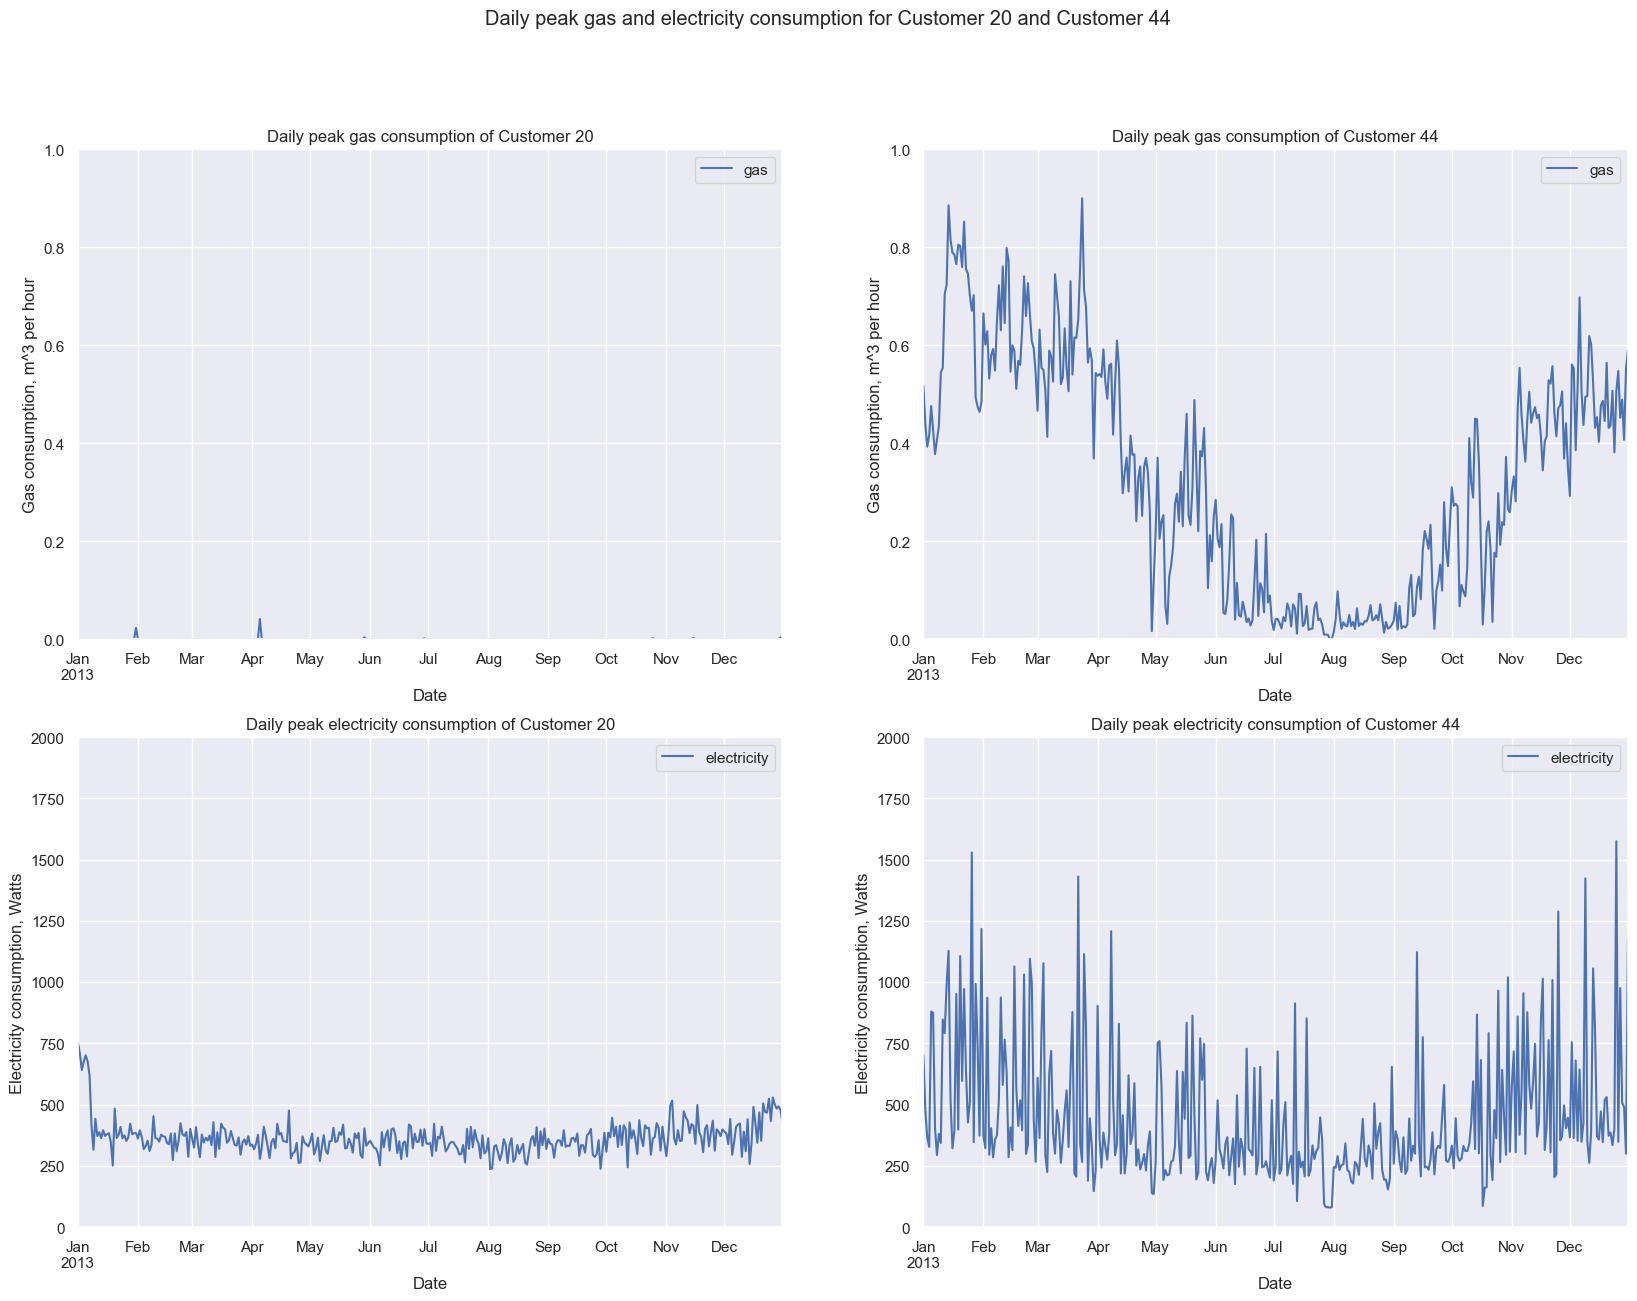

In [230]:
#// BEGIN_TODO [Daily-peaks-plots] (2 points)

fig, ax = plt.subplots(2, 2, figsize = (20, 14))

df_daily_peak_household_1.plot(kind='line', y='gas', ax=ax[0, 0])
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 0].set_ylim(0, 1)
ax[0, 0].set_title(f'Daily peak gas consumption of {household_1}')

df_daily_peak_household_2.plot(kind='line', y='gas', ax=ax[0, 1])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_title(f'Daily peak gas consumption of {household_2}')

df_daily_peak_household_1.plot(kind='line', y='electricity', ax=ax[1, 0])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Electricity consumption, Watts')
ax[1, 0].set_ylim(0, 2000)
ax[1, 0].set_title(f'Daily peak electricity consumption of {household_1}')

df_daily_peak_household_2.plot(kind='line', y='electricity', ax=ax[1, 1])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Electricity consumption, Watts')
ax[1, 1].set_ylim(0, 2000)
ax[1, 1].set_title(f'Daily peak electricity consumption of {household_2}')

fig.suptitle(f'Daily peak gas and electricity consumption for {household_1} and {household_2}');


In [231]:
#// END_TODO [Daily-peaks-plots]

3. The plots from `df_daily_peak_household_1` and `df_daily_peak_household_2` make it easier to identify periods of atypical energy consumption, but there are still days where it is unclear if it is actually atypical or not.

   Use the following space to create plots to zoom in on interesting periods. Think of applying some filter, e.g., Gaussian filter or median filter, to identify interesting periods.

In [232]:
#// BEGIN_TODO [Atypical-zoom] (4 points)

df_daily_peak_household_1['filtered_gas'] = gaussian_filter1d(df_daily_peak_household_1['gas'], sigma=2, mode='nearest')
df_daily_peak_household_1['filtered_electricity'] = gaussian_filter1d(df_daily_peak_household_1['electricity'], sigma=2, mode='nearest')
df_daily_peak_household_2['filtered_gas'] = gaussian_filter1d(df_daily_peak_household_2['gas'], sigma=2, mode='nearest')
df_daily_peak_household_2['filtered_electricity'] = gaussian_filter1d(df_daily_peak_household_2['electricity'], sigma=2, mode='nearest')


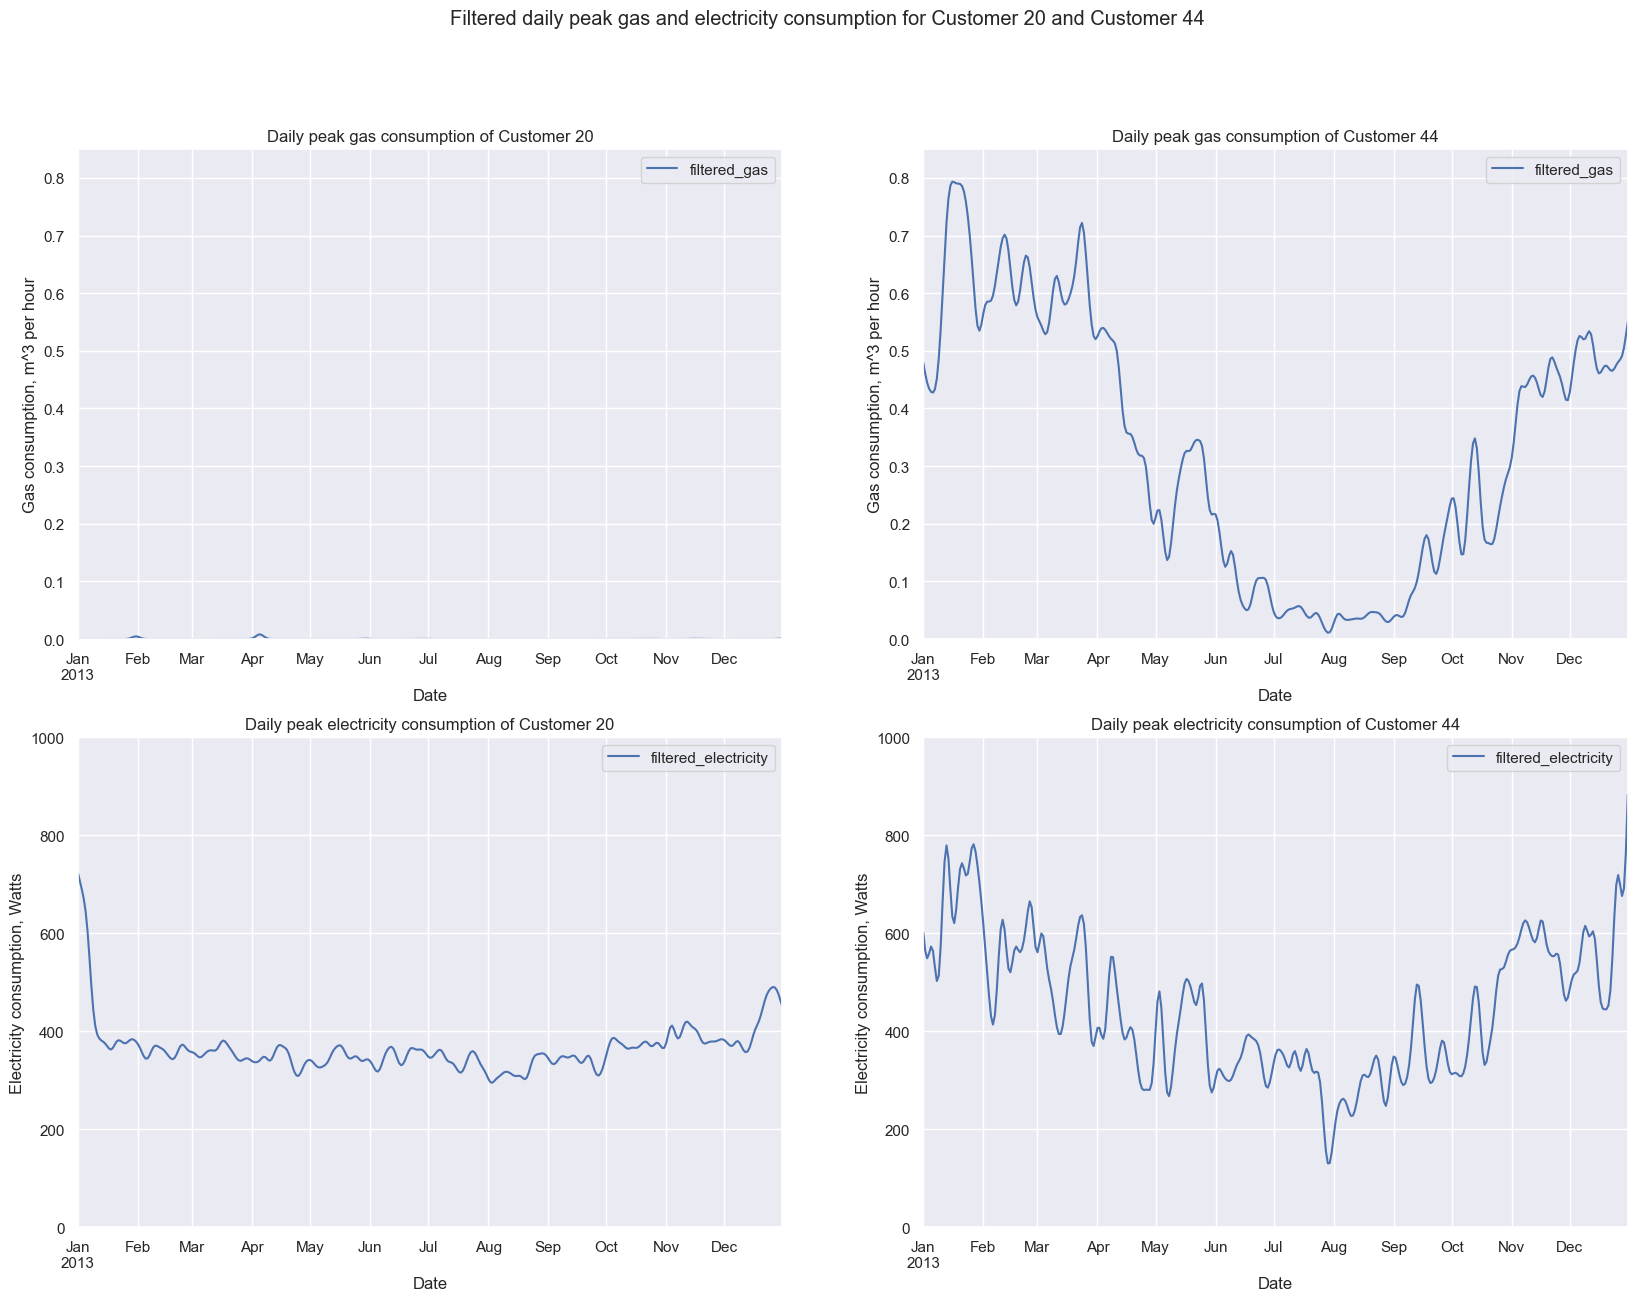

In [233]:
fig, ax = plt.subplots(2, 2, figsize = (20, 14))

df_daily_peak_household_1.plot(kind='line', y='filtered_gas', ax=ax[0, 0])
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 0].set_ylim(0, 0.85)
ax[0, 0].set_title(f'Daily peak gas consumption of {household_1}')

df_daily_peak_household_2.plot(kind='line', y='filtered_gas', ax=ax[0, 1])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 1].set_ylim(0, 0.85)
ax[0, 1].set_title(f'Daily peak gas consumption of {household_2}')

df_daily_peak_household_1.plot(kind='line', y='filtered_electricity', ax=ax[1, 0])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Electricity consumption, Watts')
ax[1, 0].set_ylim(0, 1000)
ax[1, 0].set_title(f'Daily peak electricity consumption of {household_1}')

df_daily_peak_household_2.plot(kind='line', y='filtered_electricity', ax=ax[1, 1])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Electricity consumption, Watts')
ax[1, 1].set_ylim(0, 1000)
ax[1, 1].set_title(f'Daily peak electricity consumption of {household_2}')

fig.suptitle(f'Filtered daily peak gas and electricity consumption for {household_1} and {household_2}');

In [234]:
#// END_TODO [Atypical-zoom]

4. Create a Series object for each household `s_atypical_1` and `s_atypical_2` with all the dates of the year as index, and values `True` and `False` representing if you find that the energy consumption on that day looks atypical. You may create these Series objects by hand. Such an object could be created like this:

   `s_atypical_1 = pd.Series(index=df_household_1['date'].unique()).fillna(False)`

   Here, `pd.Series()` creates a new Series object, using the unique values from the `date` column of `df_household_1` as index. As no data is given, the object is initialized with NaN values. `fillna(False)` fills these NaN values with `False`. You can then set particular dates or ranges of dates in the Series object to `True` by hand.

   It may be very useful to zoom in on particular days in the plots above, so feel free to do that. Be mindful of the filters you are using and check your suspicions with the hourly data. When you are confident that consumption for a particular house for a particular period is atypical, set the values in the Series object for that household for those days to `True`. Repeat this process until you can no longer find periods with atypical behavior for either household.

   Write down your reasons for marking periods as atypical and store it as a string in the variable `atypical_reasons`. Did you find different kinds of atypical behavior?

In [235]:
#// BEGIN_TODO [Atypical-series] (3 points)

s_atypical_1 = df_daily_peak_household_1.apply(lambda row: True if row['electricity'] > 460 or row['electricity'] < 240 else False, axis=1)
s_atypical_1

date
2013-01-01     True
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05     True
              ...  
2013-12-27     True
2013-12-28     True
2013-12-29     True
2013-12-30     True
2013-12-31    False
Length: 365, dtype: bool

In [236]:
s_atypical_2 = df_daily_peak_household_2.apply(lambda row: True if row['electricity'] > 950 or row['electricity'] < 200 or row['gas'] > 0.82 or row['gas'] < 0.01 else False, axis=1)
s_atypical_2

date
2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
              ...  
2013-12-27     True
2013-12-28    False
2013-12-29    False
2013-12-30    False
2013-12-31     True
Length: 365, dtype: bool

In [237]:
df_typical_1 = df_daily_peak_household_1[~s_atypical_1].copy()
df_typical_2 = df_daily_peak_household_2[~s_atypical_2].copy()

In [238]:
df_typical_1['filtered_typical_gas'] = gaussian_filter1d(df_typical_1['gas'], sigma=2, mode='nearest')
df_typical_1['filtered_typical_electricity'] = gaussian_filter1d(df_typical_1['electricity'], sigma=2, mode='nearest')
df_typical_2['filtered_typical_gas'] = gaussian_filter1d(df_typical_2['gas'], sigma=2, mode='nearest')
df_typical_2['filtered_typical_electricity'] = gaussian_filter1d(df_typical_2['electricity'], sigma=2, mode='nearest')

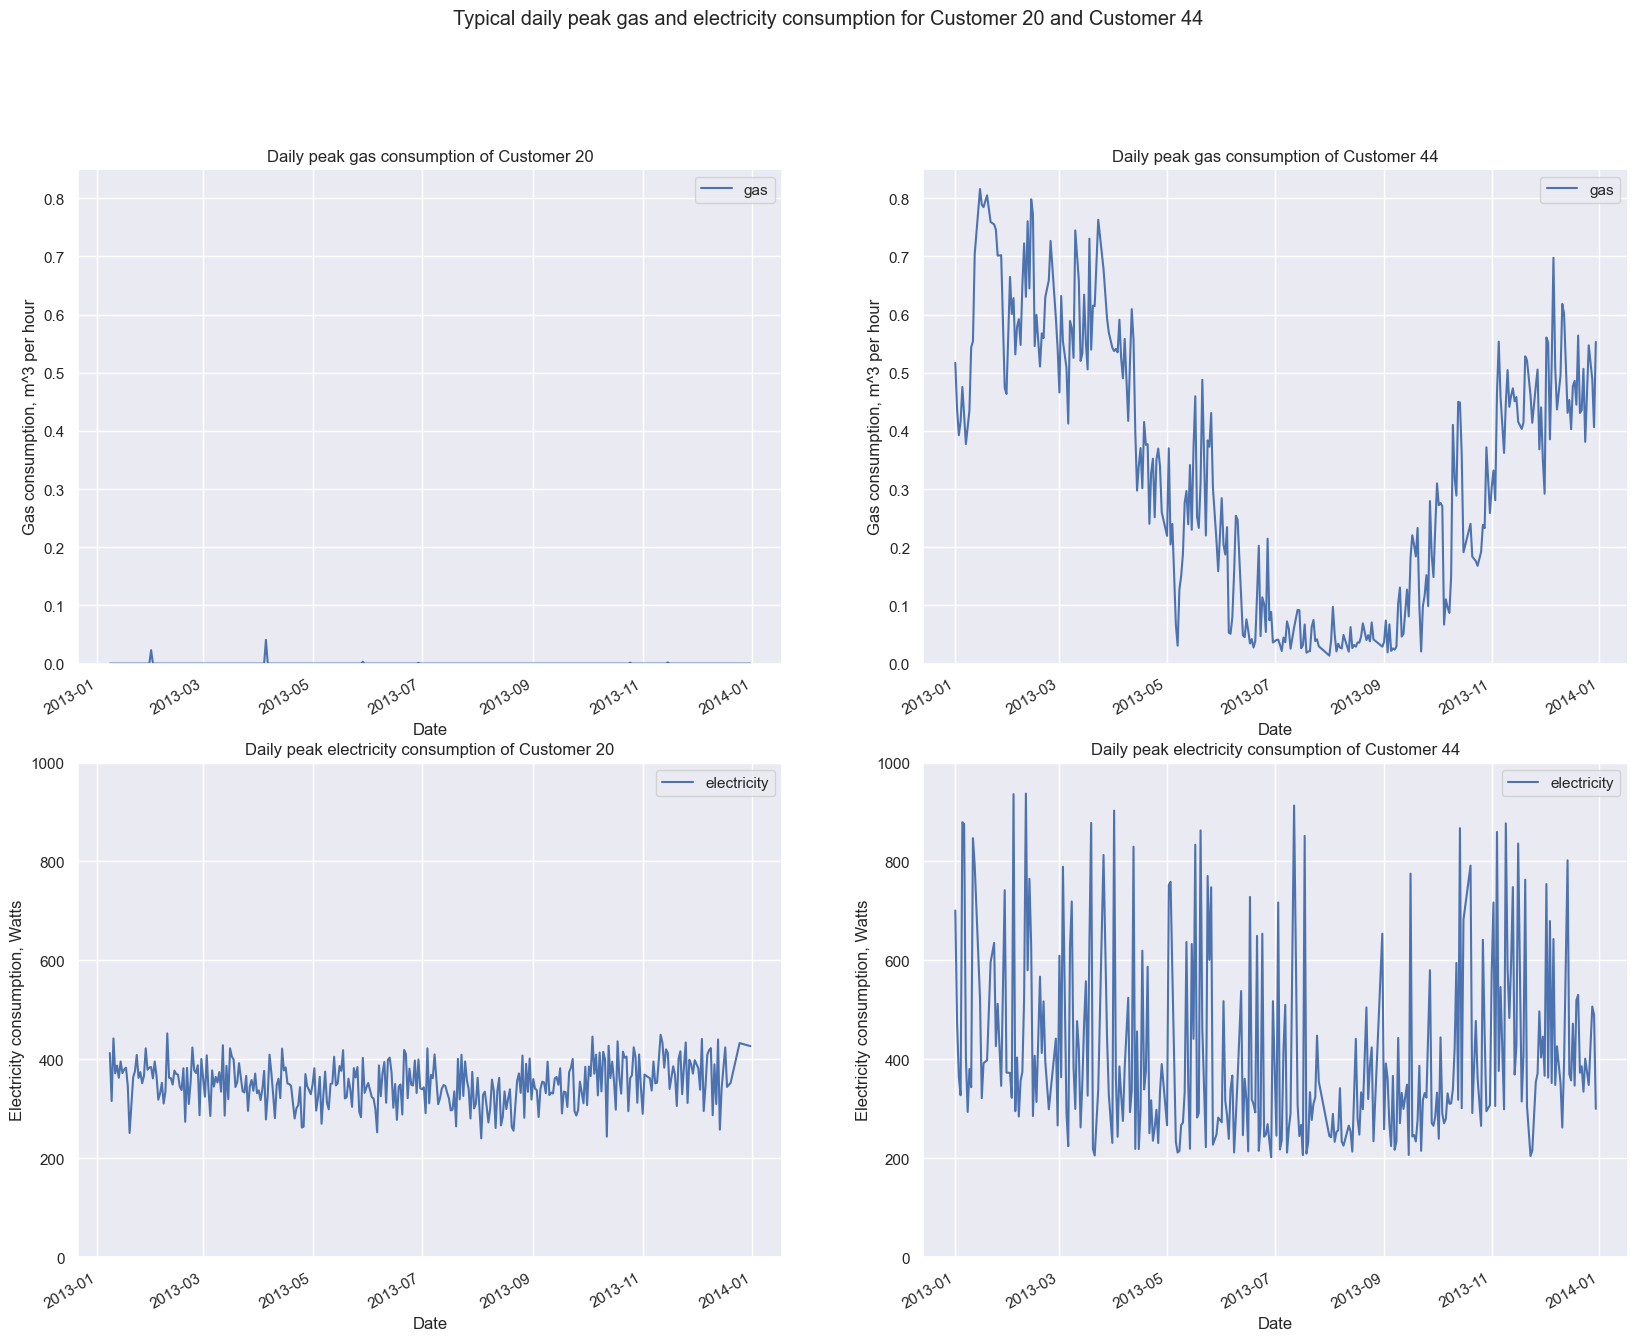

In [239]:
fig, ax = plt.subplots(2, 2, figsize = (20, 16))

df_typical_1.plot(kind='line', y='gas', ax=ax[0, 0])
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 0].set_ylim(0, 0.85)
ax[0, 0].set_title(f'Daily peak gas consumption of {household_1}')

df_typical_2.plot(kind='line', y='gas', ax=ax[0, 1])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 1].set_ylim(0, 0.85)
ax[0, 1].set_title(f'Daily peak gas consumption of {household_2}')

df_typical_1.plot(kind='line', y='electricity', ax=ax[1, 0])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Electricity consumption, Watts')
ax[1, 0].set_ylim(0, 1000)
ax[1, 0].set_title(f'Daily peak electricity consumption of {household_1}')

df_typical_2.plot(kind='line', y='electricity', ax=ax[1, 1])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Electricity consumption, Watts')
ax[1, 1].set_ylim(0, 1000)
ax[1, 1].set_title(f'Daily peak electricity consumption of {household_2}')

fig.suptitle(f'Typical daily peak gas and electricity consumption for {household_1} and {household_2}');

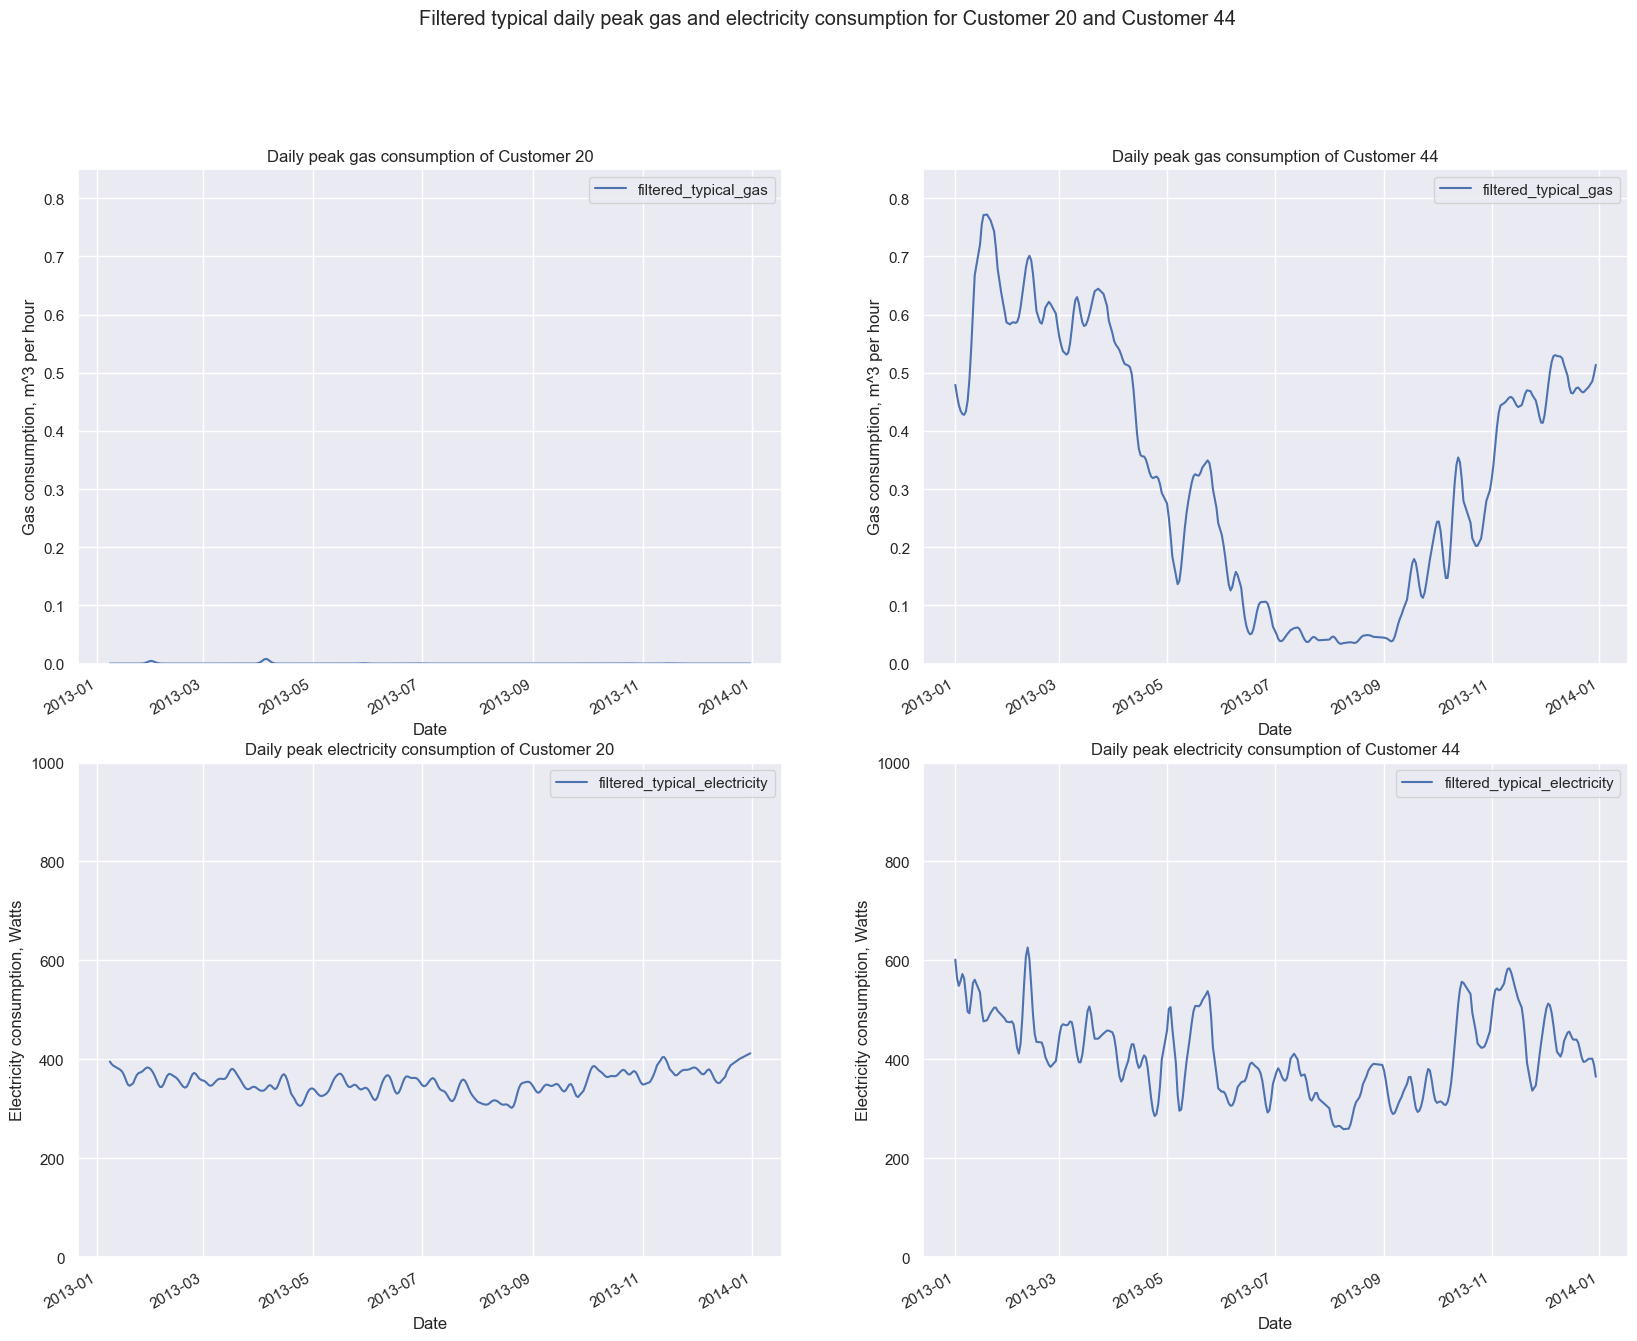

In [240]:
fig, ax = plt.subplots(2, 2, figsize = (20, 16))

df_typical_1.plot(kind='line', y='filtered_typical_gas', ax=ax[0, 0])
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 0].set_ylim(0, 0.85)
ax[0, 0].set_title(f'Daily peak gas consumption of {household_1}')

df_typical_2.plot(kind='line', y='filtered_typical_gas', ax=ax[0, 1])
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('Gas consumption, m^3 per hour')
ax[0, 1].set_ylim(0, 0.85)
ax[0, 1].set_title(f'Daily peak gas consumption of {household_2}')

df_typical_1.plot(kind='line', y='filtered_typical_electricity', ax=ax[1, 0])
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('Electricity consumption, Watts')
ax[1, 0].set_ylim(0, 1000)
ax[1, 0].set_title(f'Daily peak electricity consumption of {household_1}')

df_typical_2.plot(kind='line', y='filtered_typical_electricity', ax=ax[1, 1])
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('Electricity consumption, Watts')
ax[1, 1].set_ylim(0, 1000)
ax[1, 1].set_title(f'Daily peak electricity consumption of {household_2}')

fig.suptitle(f'Filtered typical daily peak gas and electricity consumption for {household_1} and {household_2}');

In [241]:
atypical_reasons = f'For the {household_1} there is not much to mark as atypical as they have very even consumption throughout the year. There was no reason for sorting out using gas as they almost did not use it at all. So I only sorted by electricity to cut the peak at the start of the year and some small alterations from average. For the {household_2} it gets much more complex. There are peaks and falls in both gas and electricity consumptions. There are some obvious periods when customer was not at home and there was almost zero consumption. But apart from this, there were some days with abnormally high consumptions that also were cut. But still, this household has very uneven consumption that can not be filtered easily without knowing more context of people living in this household.'

In [242]:
#// END_TODO [Atypical-series]

# Hypothesis test

You have investigated when and where values are missing, made and interpreted some initial plots of the data, written a problem statement and hypothesis based on the data, and identified atypical periods in the data. Now it is time to test your hypothesis.

1. Execute the proper steps for a hypothesis test: check whether the hypothesis test is appropriate for this data, apply the test, and report the outcome. Make sure to go through all the necessary steps in your solution: clearly write down your null hypothesis and alternative hypothesis, the level of significance, etc.

   There may (or may not) be seasonal effects to the consumption of gas and/or electricity. To reduce the influence of such effects on the hypothesis test, you may want to restrict the data to a shorter time span, for instance just to winter months, or use the weather data to make this distinction.

   Of course, you should also apply what you learned about missing values and atypical periods in this data set.

   Perform the same test for **each household separately**. Are the results the same, or different? Reflect on this in your poster. You may want to check if you have any information in `df_customer`.

In [283]:
#// BEGIN_TODO [Hypothesis-test] (1 point)

sunny_day_threshold = 6

null_hypothesis = f'Days with {sunny_day_threshold} or more hours of sunlight have the same gas consumption as days with less hours of sunshine.'
alt_hypothesis = f'There is less gas consumption during days when there is {sunny_day_threshold} or more hours of sunshine than during days when it is less hours of sunshine.'
significance_level = 0.05

Firstly, we need to create dataframes containing all data needed for the analysis, and then convert amount of sunny hours into boolean split of being a sunny day or not. I chose this threshold to be 6 hours as it shows that there definitely was a lot of sun this day while still keeping a lot of points being included.

In [284]:
query_sun_hours = f'SELECT date, SUM(sunshine_duration) AS sun_hours FROM weather_extra GROUP BY date'
df_sun_hours = pd.read_sql_query(query_sun_hours, conn, index_col='date', parse_dates=['date'])
df_sun_hours['sunny'] = df_sun_hours.apply(lambda x: True if x['sun_hours'] >= sunny_day_threshold else False, axis=1)

query_gas = f'SELECT date, SUM("{household_1}") AS gas_sum_1, SUM("{household_2}") AS gas_sum_2 FROM gas GROUP BY date'
df_gas = pd.read_sql_query(query_gas, conn, index_col='date', parse_dates=['date'])

df_typical_1 = pd.merge(df_sun_hours[['sun_hours', 'sunny']], df_gas[['gas_sum_1']], how='left', on='date')
df_typical_2 = pd.merge(df_sun_hours[['sun_hours', 'sunny']], df_gas[['gas_sum_2']], how='left', on='date')

df_typical_1

,sun_hours,sunny,gas_sum_1
date,,,
2013-01-01,1.2,False,0.031360
2013-01-02,4.4,False,0.083282
2013-01-03,0.0,False,0.213999
2013-01-04,0.0,False,0.043431
2013-01-05,0.0,False,0.015679
...,...,...,...
2013-12-27,0.0,False,0.083303
2013-12-28,4.3,False,0.082720
2013-12-29,4.8,False,0.008819


In [285]:
df_typical_2

,sun_hours,sunny,gas_sum_2
date,,,
2013-01-01,1.2,False,7.189801
2013-01-02,4.4,False,6.937601
2013-01-03,0.0,False,6.654171
2013-01-04,0.0,False,5.900389
2013-01-05,0.0,False,6.487878
...,...,...,...
2013-12-27,0.0,False,8.761976
2013-12-28,4.3,False,7.384462
2013-12-29,4.8,False,6.782687


Then there is a plot of all dots that I used to determine the threshold for the sunny days

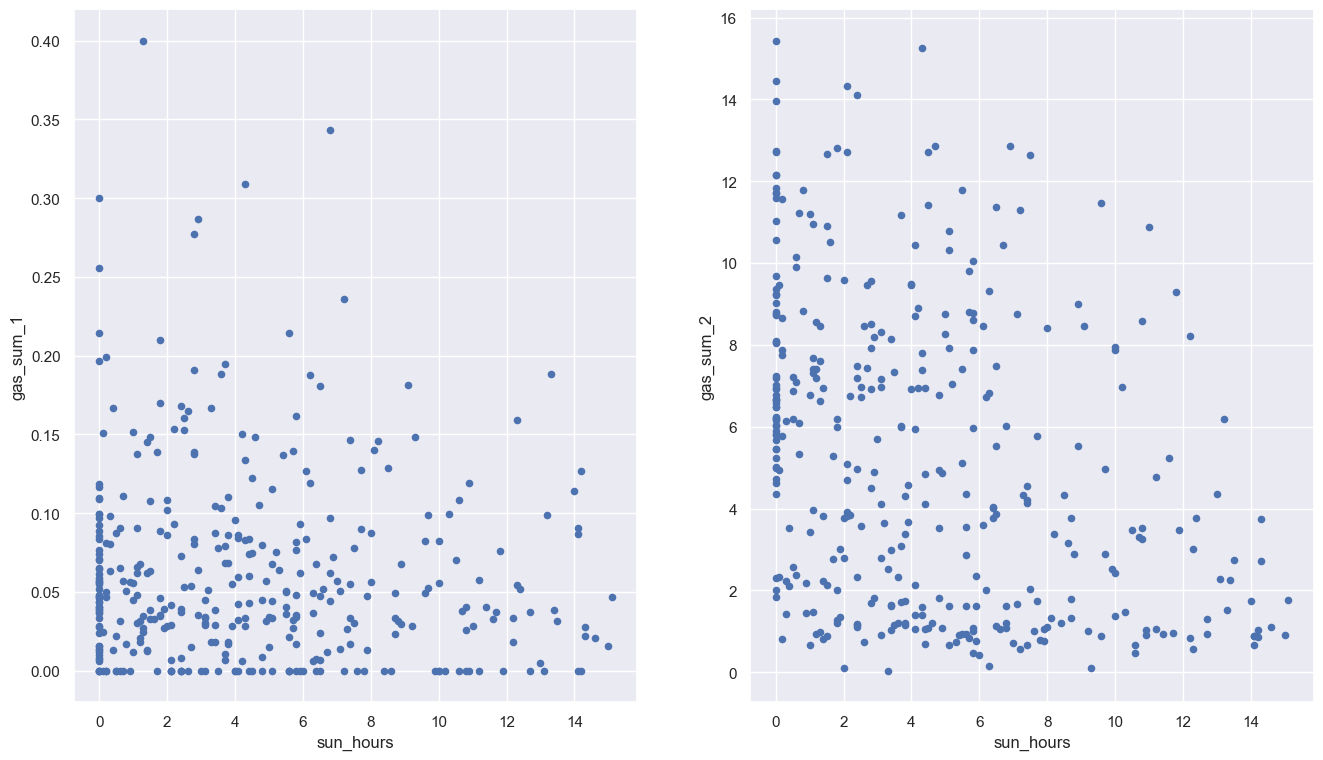

In [286]:
_, ax = plt.subplots(1, 2)

df_typical_1.plot(kind='scatter', x='sun_hours', y='gas_sum_1', ax=ax[0])
df_typical_2.plot(kind='scatter', x='sun_hours', y='gas_sum_2', ax=ax[1]);

Then I started with the hypothesis test for the first household. It shows that data is not very different in this case and we already know that this household has very even data throughout the year.

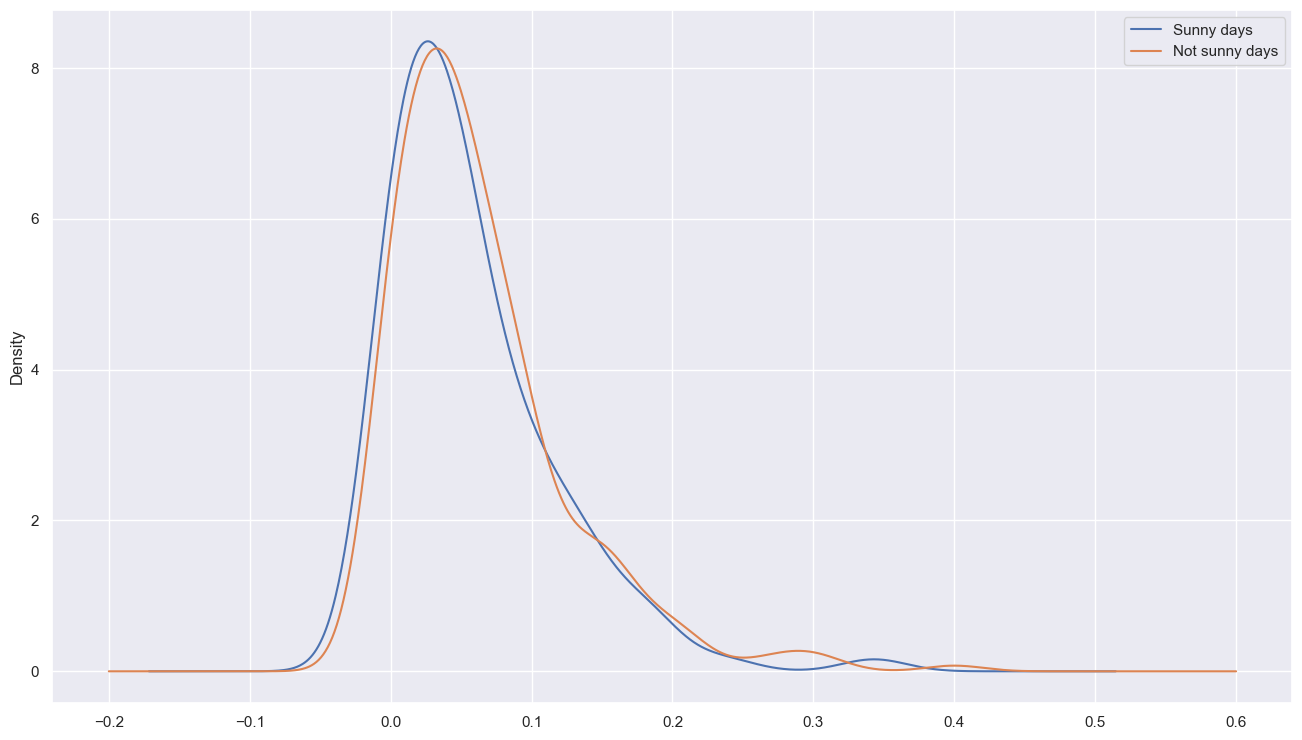

In [287]:
ax = df_typical_1[df_typical_1['sunny']]['gas_sum_1'].plot(kind='density', label='Sunny days')
df_typical_1[~df_typical_1['sunny']]['gas_sum_1'].plot(kind='density', ax = ax, label='Not sunny days')
ax.legend();

In [288]:
d_sunny_1 = sm.stats.DescrStatsW(df_typical_1[df_typical_1['sunny']]['gas_sum_1'])
d_not_sunny_1 = sm.stats.DescrStatsW(df_typical_1[~df_typical_1['sunny']]['gas_sum_1'])

cm_sunny_1 = sm.stats.CompareMeans(d_sunny_1, d_not_sunny_1)

p_sunny_1 = cm_sunny_1.ttest_ind(alternative='smaller')[1]
p_sunny_1

np.float64(0.1615541206094901)

After doing the hypothesis test we can see that the obtained p-score is around 0.16 which definitely bigger than our significance level of 0.05, therefore we can not reject the null hypothesis, meaning that we can not prove that for this household having a sunny day means less gas consumption.

In [289]:
reject_null_2 = p_sunny_1 < significance_level
reject_null_2

np.False_

Then we are doing the same for the second household. Here data is very different and we can see that the density plot for not sunny days has a lot of data with higher gas consumption.

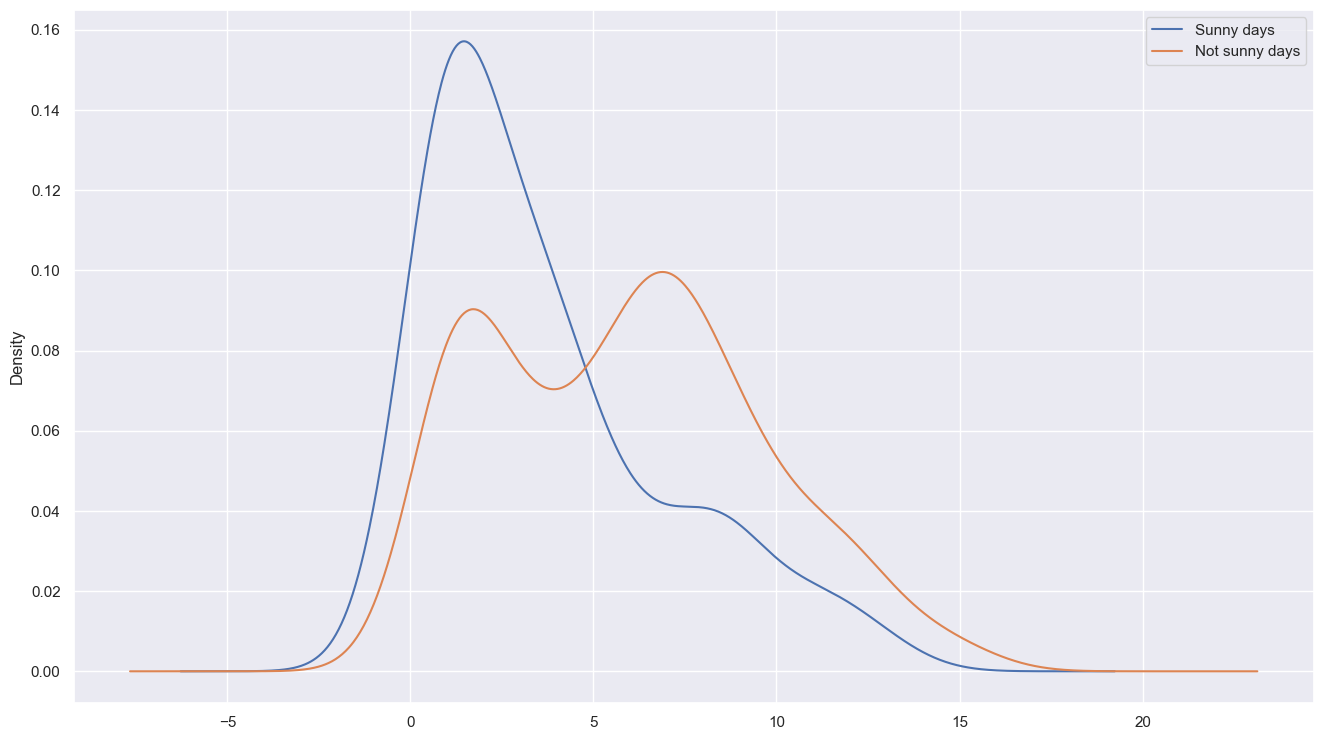

In [290]:
ax = df_typical_2[df_typical_2['sunny']]['gas_sum_2'].plot(kind='density', label='Sunny days')
df_typical_2[~df_typical_2['sunny']]['gas_sum_2'].plot(kind='density', ax = ax, label='Not sunny days')
ax.legend();

In [291]:
d_sunny_2 = sm.stats.DescrStatsW(df_typical_2[df_typical_2['sunny']]['gas_sum_2'])
d_not_sunny_2 = sm.stats.DescrStatsW(df_typical_2[~df_typical_2['sunny']]['gas_sum_2'])

cm_sunny_2 = sm.stats.CompareMeans(d_sunny_2, d_not_sunny_2)

p_sunny_2 = cm_sunny_2.ttest_ind(alternative='smaller')[1]
p_sunny_2

np.float64(7.185111469671918e-08)

After doing the hypothesis test, we can see that p-score is very low meaning that we for sure can reject the null hypothesis, therefore proving that for this household it is true that the gas consumption is much lower on sunny days.

In [292]:
reject_null_2 = p_sunny_2 < significance_level
reject_null_2

np.True_

In [ ]:
#// END_TODO [Hypothesis-test]

# Create your poster

Finally, create a poster on which you present and discuss your results. You **must use the template of the poster for GA2 available on Canvas**. There, you can also find more information on how to create your poster.

In case you want to perform any additional analysis, please, use the cells below.

<div class="alert alert-block alert-danger">
    <ol>
        <li>Include supporting evidence for choosing your hypothesis in your poster.</li>
        <li>Double-check if the visualizations are produced correctly on Momotor under the <b>Running submitted notebook</b> tab. Make sure that every visualization on your poster can also be seen under that tab.</li>
    </ol>
</div>

In [ ]:
#// BEGIN_TODO [Poster] (0 points)

# ===== =====> Replace this line by your code. <===== ===== #


In [ ]:
#// END_TODO [Poster]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

feedback_time = 25

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

feedback_difficulty = 7.5

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2024-2025 - **TU/e** - Eindhoven University of Technology